# PROJECT DEFINITION
1. Malfunction of the brain by disease or disorder affects normal activity in humans. Early as well as post discovery of schizophrenia may help during implementation of possible treatment methods to cure or limit the effects. Thus in this project, the EEG signals are extracted and machine learning algorithms are used to detect schizophrenia.
2. Electroencephalogram (EEG) is a physiological test that captures the brain signals to make  diagnostic, therapeutic and prognostic analyses of neuropsychiatric states. EEG signals comprise different frequency components (in Hz).

# THE DATASET 
1. RepOD >IBIBPAN- Department of Methods of Brain   Imaging and Functional  Research of Nervous system>EEG in schizophrenia.
2. The proposed ADT is employed to evaluate a 19-channel EEG signal collected from normal and schizophrenia class volunteers.
3. The dataset comprised 14 patients with paranoid schizophrenia and 14 healthy with 19-channel  per a single patient within similar age and gender ratio were recruited from the same institute.
4. The available data is in the EDF format  is sampled version . At a frequency of 250HZ
5. The dataset is in edf form.

# GETTING INTO THE DATASET

In [1]:
from tqdm import tqdm
import pywt
import eeglib
import pyedflib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [68]:
#The random.seed() method sets the initial conditions for the random number generator.
np.random.seed(42)

In [2]:
#OPENING ONE FILE FROM HEALTHY PEOPLE
f=pyedflib.data.get_generator_filename()
f=pyedflib.EdfReader('h01.edf')
n=f.signals_in_file
signal_labels=list(f.getSignalLabels())
duration=f.getFileDuration()
sample=f.readSignal(3)

n_samples=[]
for i in range(19):
    r=f.readSignal(i)
    n_samples.append(len(r))


In [3]:
print("The number of channels in each sample are: ",n)
print("The labels of each channels are: \n",signal_labels)
print("The duration of sampling from EEG is: ",duration)

print("The sampling Frequency is:",len(sample)/duration,"Hertz")
print("The number of samples each channel has got are: ",n_samples)

The number of channels in each sample are:  19
The labels of each channels are: 
 ['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']
The duration of sampling from EEG is:  925
The sampling Frequency is: 250.0 Hertz
The number of samples each channel has got are:  [231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250]


In [24]:
list(sample)

[0.0024999999991076978,
 0.0024999999991076978,
 0.0024999999991076978,
 0.3083102664256955,
 0.3083102664256955,
 -0.1504051332141862,
 -0.6091205328540679,
 0.0024999999991076978,
 1.0728359324921648,
 0.3083102664256955,
 -1.3736461989205373,
 -1.526551332133831,
 -9.324713126011819,
 -10.242143925291582,
 -11.618290124211228,
 -10.089238792078289,
 -7.336946394238999,
 -5.9608001953193535,
 -1.3736461989205373,
 3.825128330331455,
 11.776195257422737,
 24.16151104769954,
 30.43062150944459,
 34.253249839776934,
 32.5712933744307,
 26.913803445538832,
 18.656926252020963,
 8.41228232673027,
 -0.1504051332141862,
 -11.465384990997933,
 -17.58159031952969,
 -19.875167317729098,
 -17.887400585956275,
 -14.064772255623929,
 -10.395049058504876,
 -8.56018745994535,
 -10.242143925291582,
 -9.936333658864994,
 -10.700859324931464,
 -9.324713126011819,
 -5.654989928892766,
 -3.973033463546533,
 0.0024999999991076978,
 4.589653996397924,
 5.507084795677687,
 9.94133365886321,
 12.84653118991

In [4]:
#OPENING ONE FILE FROM SCHIZOPHRENICS
f=pyedflib.data.get_generator_filename()
f=pyedflib.EdfReader('s03.edf')
n=f.signals_in_file
signal_labels=list(f.getSignalLabels())
duration=f.getFileDuration()
sample=f.readSignal(3)

n_samples=[]
for i in range(19):
    r=f.readSignal(i)
    n_samples.append(len(r))


In [5]:
print("The number of channels in each sample are: ",n)
print("The labels of each channels are: \n",signal_labels)
print("The duration of sampling from EEG is: ",duration)

print("The sampling Frequency is:",len(sample)/duration,"Hertz")
print("The number of samples each channel has got are: ",n_samples)

The number of channels in each sample are:  19
The labels of each channels are: 
 ['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']
The duration of sampling from EEG is:  964
The sampling Frequency is: 250.0 Hertz
The number of samples each channel has got are:  [241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000]


In [21]:
list(sample)

[0.0024999999991076978,
 0.0024999999991076978,
 0.0024999999991076978,
 0.3083102664256955,
 0.15540513321240157,
 -0.7620256660673617,
 -0.6091205328540679,
 1.0728359324921648,
 1.8373615985586342,
 -0.6091205328540679,
 -2.4439821314135943,
 -0.1504051332141862,
 -8.101472060305468,
 -6.725325861385823,
 -1.3736461989205373,
 -0.7620256660673617,
 -2.7497923978401824,
 -1.9852667317737127,
 -4.584653996399709,
 -7.336946394238999,
 -5.349179662466178,
 -1.9852667317737127,
 0.0024999999991076978,
 -1.832361598560419,
 -0.6091205328540679,
 1.0728359324921648,
 2.6018872646251037,
 7.341946394237214,
 10.400049058503091,
 9.94133365886321,
 4.43674886318463,
 1.2257410657054588,
 -0.9149307992806556,
 -1.3736461989205373,
 3.366412930691573,
 3.366412930691573,
 1.5315513321320464,
 1.0728359324921648,
 -1.526551332133831,
 -2.7497923978401824,
 -0.6091205328540679,
 -1.0678359324939495,
 0.3083102664256955,
 3.2135077974782793,
 3.6722231971181607,
 7.341946394237214,
 4.2838437299

In [8]:
#getting file with minimum sampling time and samples
path='/home/minte/Desktop/project fiels/'
t=[]
m=[]
for r,dir,n in os.walk(path):
    for i in n:
        if 'edf' in i.split('.'):
            file=path+i
            f=pyedflib.EdfReader(file)
            sam=len(f.readSignal(0))
            m.append(sam)
            t.append(f.getFileDuration())
            print(i," : ",f.getFileDuration()," : ",sam)
            
      

h03.edf  :  910  :  227500
h07.edf  :  910  :  227500
h05.edf  :  945  :  236250
s09.edf  :  1185  :  296250
h06.edf  :  930  :  232500
h11.edf  :  915  :  228750
h08.edf  :  910  :  227500
h01.edf  :  925  :  231250
h04.edf  :  925  :  231250
s07.edf  :  1346  :  336500
h12.edf  :  900  :  225000
s08.edf  :  911  :  227750
s11.edf  :  1360  :  340000
s06.edf  :  740  :  185000
s02.edf  :  1145  :  286250
s05.edf  :  890  :  222500
s12.edf  :  1087  :  271750
h02.edf  :  910  :  227500
s13.edf  :  1135  :  283750
s01.edf  :  845  :  211250
s10.edf  :  850  :  212500
h09.edf  :  905  :  226250
h10.edf  :  1115  :  278750
s14.edf  :  2170  :  542500
h13.edf  :  965  :  241250
s03.edf  :  964  :  241000
h14.edf  :  865  :  216250
s04.edf  :  1205  :  301250
h03.edf  :  910  :  227500
h07.edf  :  910  :  227500
h05.edf  :  945  :  236250
h06.edf  :  930  :  232500
h11.edf  :  915  :  228750
h08.edf  :  910  :  227500
h01.edf  :  925  :  231250
h04.edf  :  925  :  231250
h12.edf  :  900  : 

We have understood that
1. The file with minimum sampling samples are s06.edf
2. The minimum sampling time is 740 seconds 
3. The minimum number of samples are 185000

In [9]:
#OPENINING FILE WITH MINIMUM DATA SAMPLES
f=pyedflib.data.get_generator_filename()
f=pyedflib.EdfReader('s06.edf')
n=f.signals_in_file
signal_labels=list(f.getSignalLabels())
duration=f.getFileDuration()
sample=f.readSignal(3)


In [10]:
print("The least number of samples per file in our data is: ",len(list(sample)))
print("The shortest sampling time in our dataset is: ",duration)

The least number of samples per file in our data is:  185000
The shortest sampling time in our dataset is:  740


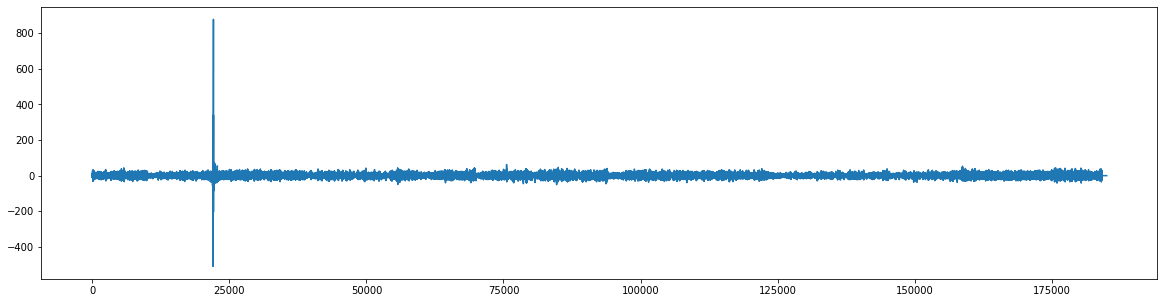

In [69]:
plt.figure(figsize=(20,5))
plt.plot(sample)


3. PREPARING AND MODIFYING THE DATASET

In [11]:
def divide_data(path,whole_list):
    #1. This function reads the signal in the file
    #2. Takes the first 185000 samples
    #3. Devide this samples into 37 places with 5000 samples each
    #4. Finally returns whole data  
    #ITERATING THROUGH THE DIRECTORY
    for r,dir,n in os.walk(path):
        #ITERATING THROUGH INDIVIDUAL .edf FILE
        for i in n:
            
            if 'edf' in i.split('.'):
                file=path+i
                print(file)
                f=pyedflib.EdfReader(file)
                #READING THE DATA OF EACH CHANNEL 
                for j in range(19):
                    file_list=[]
                    samples=f.readSignal(j)[:185000]
                    #DIVIDING CHANNEL SAMPELS INTO 37 EQUAL PLACES WITH 5000 SAMPLES
                    whole_list.append(samples)
            f.close()
    return whole_list

    
    

In [15]:
#Applying devide function on healthy people data 
path=path='/home/minte/Desktop/project fiels/healthy/'
whole_data=[]
data_healthy=divide_data(path,whole_data)

/home/minte/Desktop/project fiels/healthy/h03.edf
/home/minte/Desktop/project fiels/healthy/h07.edf
/home/minte/Desktop/project fiels/healthy/h05.edf
/home/minte/Desktop/project fiels/healthy/h06.edf
/home/minte/Desktop/project fiels/healthy/h11.edf
/home/minte/Desktop/project fiels/healthy/h08.edf
/home/minte/Desktop/project fiels/healthy/h01.edf
/home/minte/Desktop/project fiels/healthy/h04.edf
/home/minte/Desktop/project fiels/healthy/h12.edf
/home/minte/Desktop/project fiels/healthy/h02.edf
/home/minte/Desktop/project fiels/healthy/h09.edf
/home/minte/Desktop/project fiels/healthy/h10.edf
/home/minte/Desktop/project fiels/healthy/h13.edf
/home/minte/Desktop/project fiels/healthy/h14.edf


In [16]:
print("The number of datapoints we have is are: ",len(data_healthy))
print("The minimum samples we have is: ",len(data_healthy[0]))
data_healthy=pd.DataFrame(data_healthy) #conversion to the dataframe

The number of datapoints we have is are:  266
The minimum samples we have is:  185000


In [17]:
print("The shape of this data is",data_healthy.shape)

The shape of this data is (266, 185000)


In [18]:
data_healthy.head(5)

,0,1,2,3,4,5,6,7,8,9,...,184990,184991,184992,184993,184994,184995,184996,184997,184998,184999
0,0.0025,0.0025,0.0025,0.002500,0.002500,0.002500,0.002500,0.002500,-0.150405,-0.150405,...,-11.924100,-15.593824,-13.758962,-11.924100,-14.217677,-15.288013,-12.994436,-16.358349,-13.453152,-16.358349
1,0.0025,0.0025,0.0025,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,-10.853764,-13.147341,-10.242144,-9.171808,-10.547954,-11.924100,-10.242144,-12.994436,-11.924100,-14.064772
2,0.0025,0.0025,0.0025,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,-3.208508,-3.514318,-1.373646,-0.150405,0.155405,0.002500,1.072836,-0.303310,-0.303310,-2.443982
3,0.0025,0.0025,0.0025,0.002500,0.002500,0.002500,0.002500,-0.150405,-0.303310,0.155405,...,0.767026,-0.456215,0.002500,0.308310,3.213508,5.965800,6.424516,5.659990,3.519318,0.614121
4,0.0025,0.0025,0.0025,-0.150405,-0.150405,0.155405,0.461215,-0.150405,-0.609121,-0.150405,...,2.448982,1.990267,2.907698,1.531551,4.130939,4.283844,4.742559,4.436749,3.672223,2.754792


In [20]:
path=path='/home/minte/Desktop/project fiels/schizzo/'
whole_data=[]
data_schizz=divide_data(path,whole_data)


/home/minte/Desktop/project fiels/schizzo/s09.edf
/home/minte/Desktop/project fiels/schizzo/s07.edf
/home/minte/Desktop/project fiels/schizzo/s08.edf
/home/minte/Desktop/project fiels/schizzo/s11.edf
/home/minte/Desktop/project fiels/schizzo/s06.edf
/home/minte/Desktop/project fiels/schizzo/s02.edf
/home/minte/Desktop/project fiels/schizzo/s05.edf
/home/minte/Desktop/project fiels/schizzo/s12.edf
/home/minte/Desktop/project fiels/schizzo/s13.edf
/home/minte/Desktop/project fiels/schizzo/s01.edf
/home/minte/Desktop/project fiels/schizzo/s10.edf
/home/minte/Desktop/project fiels/schizzo/s14.edf
/home/minte/Desktop/project fiels/schizzo/s03.edf
/home/minte/Desktop/project fiels/schizzo/s04.edf


In [21]:
print("The number of datapoints are:",len(data_schizz))
print("The number of samples per data are: ",len(data_schizz[0]))
data_schizz=pd.DataFrame(data_schizz)


The number of datapoints are: 266
The number of samples per data are:  185000


In [22]:
print("The shape of this data is: ",data_schizz.shape)

The shape of this data is:  (266, 185000)


In [23]:
data_schizz.head(5)

,0,1,2,3,4,5,6,7,8,9,...,184990,184991,184992,184993,184994,184995,184996,184997,184998,184999
0,-0.0015,-0.001500,0.177391,0.892955,1.071845,-0.180391,-0.717064,-0.180391,0.714064,0.177391,...,2.860755,0.892955,-5.010446,-11.629409,-13.418318,-13.239427,-11.271627,-15.386118,-17.353918,-19.679500
1,-0.0015,-0.001500,-0.359282,-2.327082,-2.148191,2.502973,4.828555,-2.327082,-8.946046,-2.863755,...,-4.294882,-5.189336,-8.767155,-10.019391,-6.262682,-7.336027,-7.872700,-11.629409,-16.996137,-19.321718
2,-0.0015,-0.001500,-0.359282,-2.148191,-1.790409,1.966300,4.112991,-1.969300,-7.872700,-2.505973,...,-5.547118,-3.758209,-2.684864,-4.473773,-3.221536,-1.074845,-1.969300,-2.327082,-4.652664,-5.904900
3,-0.0015,-0.001500,0.177391,0.892955,1.071845,-0.359282,-1.074845,0.177391,1.071845,0.356282,...,-1.432627,0.177391,3.039645,1.608518,3.218536,6.617464,6.975246,6.259682,5.007446,3.755209
4,-0.0015,0.177391,-2.684864,-12.344973,-11.450518,10.195282,20.749846,-7.693809,-35.958573,-11.271627,...,-3.400427,-3.400427,-2.863755,-3.042645,-2.327082,3.218536,4.828555,6.975246,8.227482,11.626409


In [24]:
total_data=pd.concat([data_healthy,data_schizz],axis=0)
total_data.shape

(532, 185000)

# FEATURE EXTRACTION

1. we use wavelet transform with db1 family
2. we are going to extract
   1. Detrended Fluctuation Analysis 
   2. Higuchi Fractal Dimension 
   3. Lempel-Ziv Complexity (LZ76)
   4. Petrosian Fractal Dimension 
   5. Number of sign changes 
   6. Hjorth Activity 
   7. Hjorth Complexity
   8. Hjorth Mobility 
   9. Sample Entropy
   10. The minimum of transformed data
   11. The maximum of transformed data
   12. Mean
   13. Median
   14. Standard deviation

In [33]:
data_array=total_data.to_numpy()
features=["DFA","HFD","LZC","PFD","CountSignChanges","hjorthActivity","hjorthComplexity","hJorthMobility","samplEntropy","minumum","maximum","mean","median","standard_deviation"]
def feature_extraction(data):
    features_data=[]
    for array in tqdm(data):
       
        #Wavelet transform
        wt=pywt.Wavelet('db1')
        CA,CD=pywt.dwt(array,wavelet=wt,mode='zero')
        transformed_data=CA+CD
        dfa=eeglib.features.DFA(transformed_data)
        hfd=eeglib.features.HFD(transformed_data)
        lzc=eeglib.features.LZC(transformed_data)
        pfd=eeglib.features.PFD(transformed_data)
        sign_change=eeglib.features.countSignChanges(transformed_data)
        hj_activity=eeglib.features.hjorthActivity(transformed_data)
        hj_complexity=eeglib.features.hjorthComplexity(transformed_data)
        hj_mobility=eeglib.features.hjorthMobility(transformed_data)
        smaple_entropy=eeglib.features.sampEn(transformed_data)
        minimum=min(transformed_data)
        maximum=max(transformed_data)
        mean=np.mean(transformed_data)
        median=np.median(transformed_data)
        std=np.std(transformed_data)
        extrated_feature=[dfa,hfd,lzc,pfd,sign_change,hj_activity,hj_complexity,hj_mobility,smaple_entropy,minimum,maximum,mean,median,std]
        features_data.append(extrated_feature)
        extrated_feature=[]
        
       
    return features_data




In [35]:
#APPLYING THE FUNCTION AND EXTARCTING FUNCTION
data_extraction=feature_extraction(data_array)
df_extraxtion=pd.DataFrame(data_extraction,columns=features)
df_extraxtion.to_csv('total.csv')

100%|██████████| 532/532 [3:13:11<00:00, 21.79s/it]  


In [36]:
df_extraxtion.head(5)

,DFA,HFD,LZC,PFD,CountSignChanges,hjorthActivity,hjorthComplexity,hJorthMobility,samplEntropy,minumum,maximum,mean,median,standard_deviation
0,0.664044,2.083534,0.562509,1.013173,12785,404.358461,3.695869,0.198917,0.663366,-282.622815,323.715584,-0.010972,0.219776,20.108666
1,0.618697,2.095941,0.621899,1.013466,14857,138.782788,2.632960,0.307974,0.995434,-116.766342,219.703897,0.000475,0.003536,11.780611
2,0.552601,2.097616,0.705544,1.013484,17871,31.283776,1.888230,0.438552,1.252625,-121.956114,186.186617,0.003218,0.003536,5.593190
3,0.427055,2.089766,0.689671,1.011912,19342,92.348292,1.366708,0.534652,1.452198,-91.682442,171.698503,0.014076,-0.212705,9.609802
4,0.479336,2.082176,0.610663,1.009637,16710,110.883706,1.338466,0.494040,1.134240,-105.305594,158.724072,0.007888,0.003536,10.530133


# DATA STANDARDIZATION

In [43]:
#Let us standardize our data using standard scaler of sklearn

from sklearn.preprocessing import StandardScaler
target=pd.DataFrame([1 for i in range(266)]+[0 for i in range(266)])
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df_extraxtion)

scaled_data=pd.DataFrame(scaled_data,columns=features)
total_scaled_data=pd.concat([scaled_data,target],axis=1)
total_scaled_data.to_csv("total_final_data.csv")





In [44]:
scaled_data.head(5)

,DFA,HFD,LZC,PFD,CountSignChanges,hjorthActivity,hjorthComplexity,hJorthMobility,samplEntropy,minumum,maximum,mean,median,standard_deviation
0,1.042379,-0.258589,-1.185625,-0.221617,-0.796636,-0.072752,2.500985,-2.040724,-1.549062,0.100513,-0.149493,-0.019831,0.578269,0.152540
1,0.666587,0.458545,-0.540182,-0.151988,-0.611313,-0.125066,1.071778,-1.134801,-0.625904,0.258617,-0.235602,0.007980,-0.188871,-0.222078
2,0.118836,0.555380,0.368864,-0.147875,-0.341736,-0.146242,0.070401,-0.050095,0.089095,0.253670,-0.263350,0.014641,-0.188871,-0.500404
3,-0.921574,0.101647,0.196359,-0.520394,-0.210168,-0.134213,-0.630847,0.748201,0.643913,0.282529,-0.275345,0.041021,-0.956011,-0.319726
4,-0.488316,-0.337048,-0.662293,-1.059783,-0.445578,-0.130562,-0.668821,0.410838,-0.240020,0.269542,-0.286086,0.025988,-0.188871,-0.278327


In [45]:
total_scaled_data.head(5)

,DFA,HFD,LZC,PFD,CountSignChanges,hjorthActivity,hjorthComplexity,hJorthMobility,samplEntropy,minumum,maximum,mean,median,standard_deviation,0
0,1.042379,-0.258589,-1.185625,-0.221617,-0.796636,-0.072752,2.500985,-2.040724,-1.549062,0.100513,-0.149493,-0.019831,0.578269,0.152540,1
1,0.666587,0.458545,-0.540182,-0.151988,-0.611313,-0.125066,1.071778,-1.134801,-0.625904,0.258617,-0.235602,0.007980,-0.188871,-0.222078,1
2,0.118836,0.555380,0.368864,-0.147875,-0.341736,-0.146242,0.070401,-0.050095,0.089095,0.253670,-0.263350,0.014641,-0.188871,-0.500404,1
3,-0.921574,0.101647,0.196359,-0.520394,-0.210168,-0.134213,-0.630847,0.748201,0.643913,0.282529,-0.275345,0.041021,-0.956011,-0.319726,1
4,-0.488316,-0.337048,-0.662293,-1.059783,-0.445578,-0.130562,-0.668821,0.410838,-0.240020,0.269542,-0.286086,0.025988,-0.188871,-0.278327,1


# DATA VISUALIZATION


In [2]:
data=pd.read_csv("total_final_data.csv",index_col=[0])

<AxesSubplot:title={'center':'the total line plot figure'}>

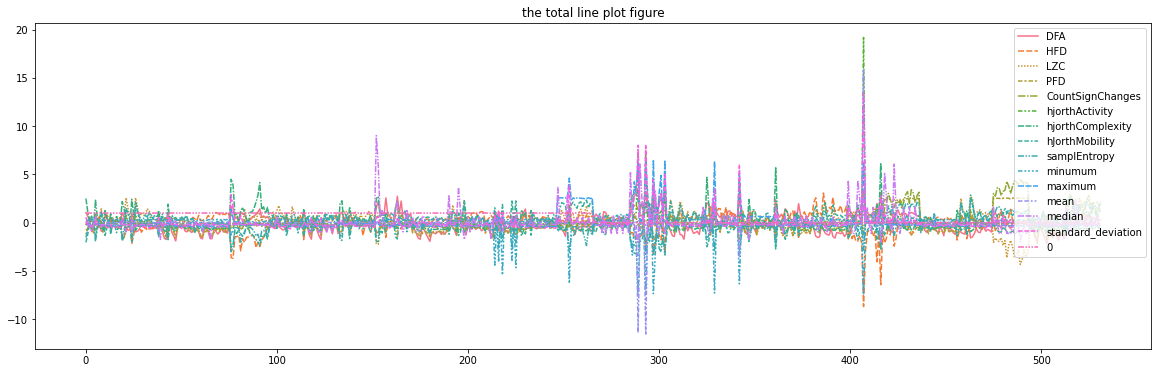

In [17]:
plt.figure(figsize=(20,6))
plt.title("the total line plot figure")
sns.lineplot(data=data)


# MODEL SELECTION

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from statistics import mean 




In [4]:
array=data.values
x=array[:,0:14]
y=array[:,14]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [19]:
models=[]
models.append(LogisticRegression(solver='liblinear',multi_class='ovr'))
models.append(LinearDiscriminantAnalysis())
models.append(KNeighborsClassifier())
models.append(GaussianNB())
models.append(SVC(gamma='auto'))
models.append(RandomForestClassifier())
models.append(DecisionTreeClassifier())
models


[LogisticRegression(multi_class='ovr', solver='liblinear'),
 LinearDiscriminantAnalysis(),
 KNeighborsClassifier(),
 GaussianNB(),
 SVC(gamma='auto'),
 RandomForestClassifier(),
 DecisionTreeClassifier()]

In [74]:
def cross_validator(models,number_splits):
    results=[]
    names=[]
    res=[]
    for model in models:
        kfold=StratifiedKFold(n_splits=number_splits,random_state=1,shuffle=True)
        cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
        
        results.append(round(cv_results.mean(),2))
    return results
    


In [75]:
number_of_split=[5,10,15,20]
final_result=[]
for i in number_of_split:
    result=cross_validator(models,i)
    final_result.append(result)

index=['Set_one','Set_two','Set_three','Set_four']
columns=['Log_regression','LDA','KNN','GaussianNB','SVM','Randomforest','Decision_tree']
result_dataframe=pd.DataFrame(final_result,index=index,columns=columns)
result_dataframe
    

,Log_regression,LDA,KNN,GaussianNB,SVM,Randomforest,Decision_tree
Set_one,0.73,0.72,0.79,0.65,0.74,0.85,0.79
Set_two,0.74,0.73,0.79,0.65,0.74,0.87,0.78
Set_three,0.74,0.73,0.79,0.65,0.75,0.85,0.77
Set_four,0.74,0.72,0.79,0.65,0.74,0.87,0.80


We can understand that Random forest is the best one.

# HYPERPARAMETER TUNING

In [92]:
model_random_forest=RandomForestClassifier()
parameters={'n_estimators':[5,10,15,20,50,100]}
rf=GridSearchCV (model_random_forest,parameters,scoring='neg_mean_squared_error',cv=10)
rf.fit(x_train,y_train)
print("The best number of estimators are: ",rf.best_params_)
print("The best score we have got is: ",rf.best_score_)

The best number of estimators are:  {'n_estimators': 50}
The best score we have got is:  -0.1292358803986711


# TRAINING

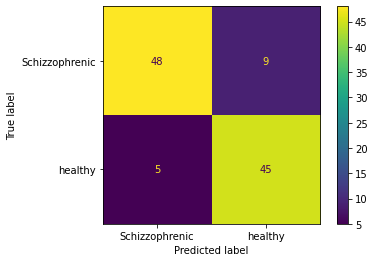

In [98]:
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)
predictions=model.predict(x_test)
conf_matrix=confusion_matrix(y_test,predictions)
disp=ConfusionMatrixDisplay(conf_matrix,display_labels=['Schizzophrenic','healthy'])
disp.plot()
plt.show()

In [101]:
print("Here the total report of the classification: \n")
print(classification_report(y_test,predictions))

Here the total report of the classification: 

              precision    recall  f1-score   support

         0.0       0.91      0.84      0.87        57
         1.0       0.83      0.90      0.87        50

    accuracy                           0.87       107
   macro avg       0.87      0.87      0.87       107
weighted avg       0.87      0.87      0.87       107



# DEEP LEARNING

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential


In [134]:

model_dl=keras.Sequential()
model_dl.add(keras.layers.Dense(14,activation='relu'))
model_dl.add(keras.layers.Dense(8,activation='relu'))
model_dl.add(keras.layers.Dense(6,activation='relu'))
model_dl.add(keras.layers.Dense(2,activation='softmax'))

In [135]:
model_dl.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [136]:
model_dl.build((1,14))
model_dl.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (1, 14)                   210       
                                                                 
 dense_91 (Dense)            (1, 8)                    120       
                                                                 
 dense_92 (Dense)            (1, 6)                    54        
                                                                 
 dense_93 (Dense)            (1, 2)                    14        
                                                                 
Total params: 398
Trainable params: 398
Non-trainable params: 0
_________________________________________________________________


In [137]:
model_dl.fit(x_train,y_train,epochs=200)
pred=model_dl.predict(x_test)


Epoch 1/200
14/14 [==============================] - 1s 2ms/step - loss: 0.6637 - accuracy: 0.5153
Epoch 2/200
14/14 [==============================] - 0s 4ms/step - loss: 0.6478 - accuracy: 0.5506
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6323 - accuracy: 0.6024
Epoch 4/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6192 - accuracy: 0.6424
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 0.6070 - accuracy: 0.6753
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 0.5980 - accuracy: 0.6776
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5878 - accuracy: 0.6918
Epoch 8/200
14/14 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7059
Epoch 9/200
14/14 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7106
Epoch 10/200
14/14 [==============================] - 0s 4ms/step - loss: 0.5564 - accuracy: 0.7082
Epoch 11/

In [138]:
model_dl.save('/home/minte/Desktop/prosd')

INFO:tensorflow:Assets written to: /home/minte/Desktop/prosd/assets


In [139]:
pred=model_dl.predict(x_test)
prediction=[]
for i in pred:
    prediction.append(np.argmax(i))

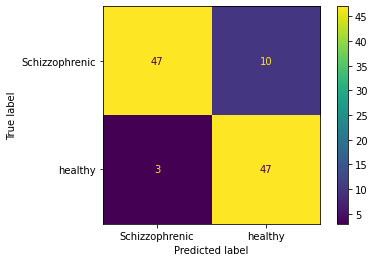

In [141]:
conf_matrix=confusion_matrix(y_test,prediction)
disp=ConfusionMatrixDisplay(conf_matrix,display_labels=['Schizzophrenic','healthy'])
disp.plot()
plt.show()

In [143]:
print("The following is the caliisification report of the dl model: \n ")
print(classification_report(y_test,prediction,target_names=['schizzophrenic','healthy']))

The following is the caliisification report of the dl model: 
 
                precision    recall  f1-score   support

schizzophrenic       0.94      0.82      0.88        57
       healthy       0.82      0.94      0.88        50

      accuracy                           0.88       107
     macro avg       0.88      0.88      0.88       107
  weighted avg       0.89      0.88      0.88       107



# CONCLUSION

1. The best model is our deep learning model.
2. The best accuracy we have got is 88 percent.
3. Healthy people precision is 82 showing that among all those predicted tyo have schizzophrenia 82 percent are healthy.
4. schizzophrenia people precision is 94 showing that among all those predicted tyo have schizzophrenia 94 percent are schizzophrenic.
5. Healthy people recall is 94 showing that among all those who are healthy 94 percent are precited to be healthy.
6. Schizzophrenia people recall is 82 showing that among all those who are schizzophrenic 82 percent are precited to be schizzophrenic.